# Introduction to Artificial Neural Networks with Keras

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from scipy.special import expit as sigmoid
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Perceptron

In [4]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [5]:
y_pred

array([ True, False])

The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:

In [9]:
sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
print(sgd_clf.coef_ == per_clf.coef_)
print(sgd_clf.intercept_ == per_clf.intercept_)

[[ True  True]]
[ True]


When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

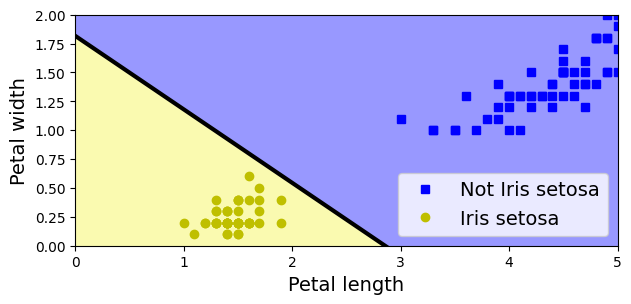

In [11]:
a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

**Activation functions**

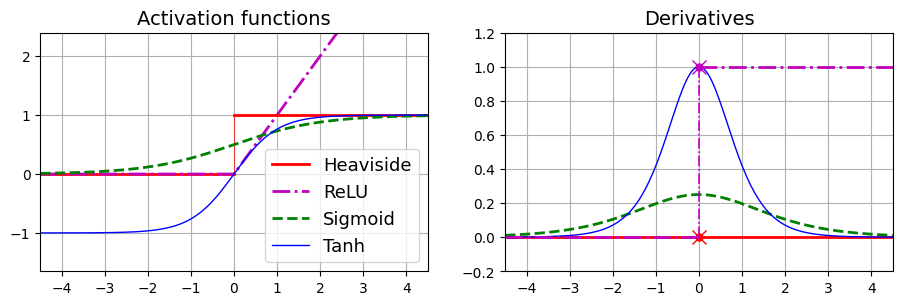

In [14]:
def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])
plt.show()

### Regression MLPs

In [18]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [20]:
rmse

0.5053326657968588

### Classification MLPs

In [21]:
iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

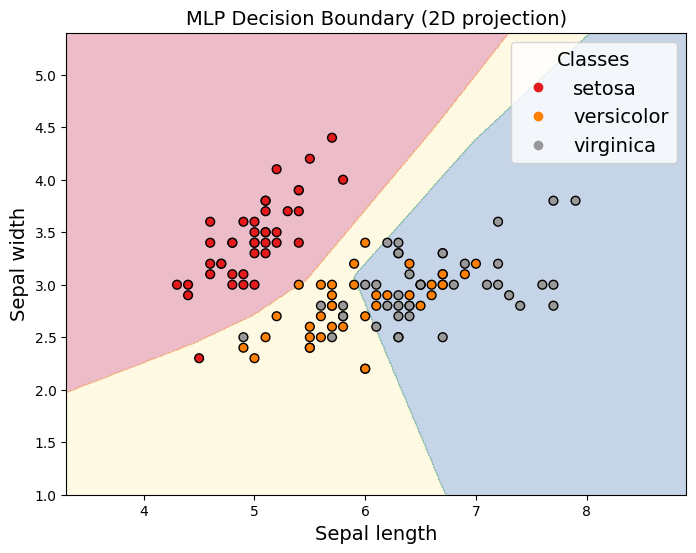

In [29]:
X = iris.data[:, :2]  # Use only the first two features for 2D plotting
y = iris.target

XTrainFull, XTest, yTrainFull, yTest = train_test_split(X, y, test_size=0.1, random_state=42)
XTrain, XValid, yTrain, yValid = train_test_split(XTrainFull, yTrainFull, test_size=0.1, random_state=42)

pipeline.fit(XTrain, yTrain)

# Create meshgrid for decision boundary plot
xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(xMin, xMax, 500), np.linspace(yMin, yMax, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on grid
Z = pipeline.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)

scatter = plt.scatter(
    XTrain[:, 0], XTrain[:, 1], c=yTrain,
    cmap=plt.cm.Set1, edgecolor="k", s=40
)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("MLP Decision Boundary (2D projection)")

handles, _ = scatter.legend_elements()
plt.legend(handles, iris.target_names, title="Classes")

plt.show()

### Implementing MLPs with Keras

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [33]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [34]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [35]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

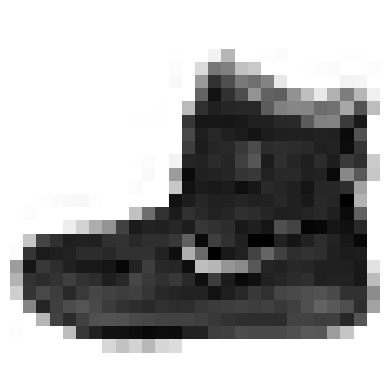

In [36]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [37]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [39]:
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

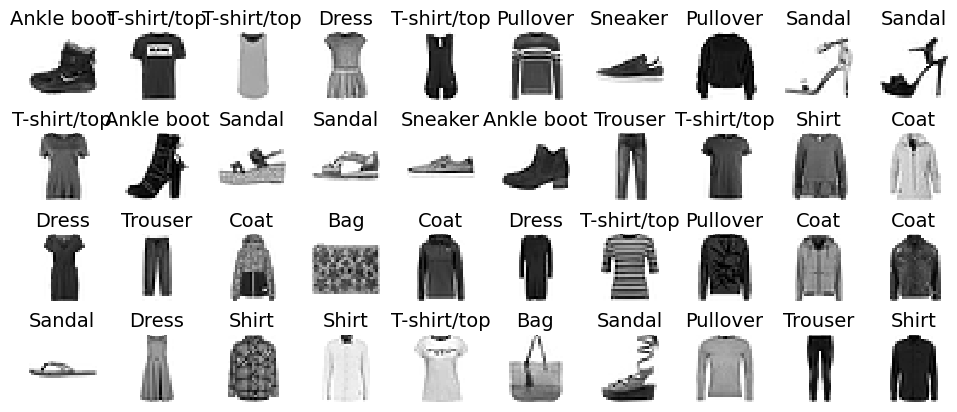

In [40]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating the model using the Sequential API

In [47]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [48]:
tf.keras.backend.clear_session() # Reset the name counters i.e. the meta data
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [54]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [55]:
model.get_layer('dense') is hidden1

True

In [56]:
weights, biases = hidden1.get_weights()
weights

array([[-0.05970272, -0.02449814,  0.03119152, ..., -0.04179012,
         0.04443719,  0.04163215],
       [ 0.00606732, -0.03323868, -0.04670604, ..., -0.03106499,
         0.03858279,  0.0240101 ],
       [-0.00419656,  0.00401685,  0.02534346, ..., -0.06308528,
         0.00327437,  0.01637872],
       ...,
       [-0.03611138,  0.0692573 ,  0.00695067, ...,  0.00525855,
         0.008762  , -0.06065521],
       [-0.06108947, -0.07256123, -0.04052193, ...,  0.03654773,
        -0.04600915, -0.0499902 ],
       [-0.00872598, -0.03734655,  0.04773693, ..., -0.00999504,
         0.00999124, -0.02733999]], dtype=float32)

In [57]:
weights.shape

(784, 300)

In [58]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
biases.shape

(300,)

### Compiling the model

In [60]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

In [61]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [63]:
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

### Training and evaluating the model

In [64]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 0.9788 - sparse_categorical_accuracy: 0.6861 - val_loss: 0.5030 - val_sparse_categorical_accuracy: 0.8290
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - loss: 0.5038 - sparse_categorical_accuracy: 0.8252 - val_loss: 0.4507 - val_sparse_categorical_accuracy: 0.8416
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 0.4510 - sparse_categorical_accuracy: 0.8431 - val_loss: 0.4279 - val_sparse_categorical_accuracy: 0.8482
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 0.4206 - sparse_categorical_accuracy: 0.8539 - val_loss: 0.4133 - val_sparse_categorical_accuracy: 0.8528
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 0.3987 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.4040 - val_sparse_categorical_accuracy: 0.8558
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - loss: 0.3819 - sparse_categorical_accuracy: 0.8665 - val_loss: 0.3951 - val_sparse_categoric

In [65]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [66]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


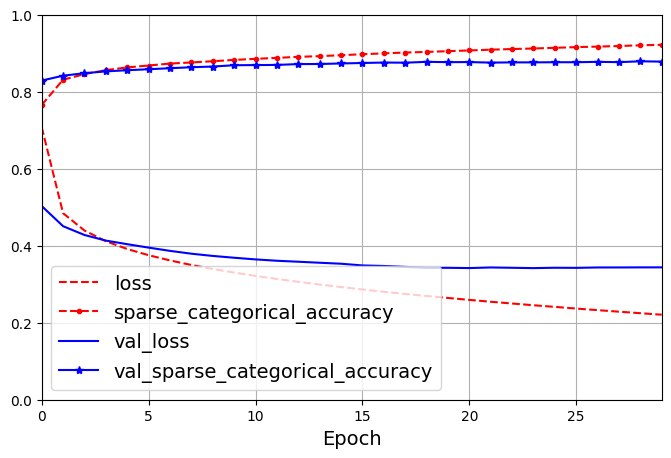

In [70]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [71]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.3684 - sparse_categorical_accuracy: 0.8734


[0.36611270904541016, 0.8748000264167786]

### Using the model to make predictions

In [72]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.01, 0.  , 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [73]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [74]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [75]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

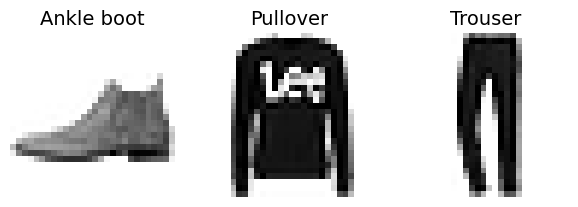

In [76]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Building a Regression MLP Using the Sequential API

In [77]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [78]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/Users/kourosh/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - RootMeanSquaredError: 1.2023 - loss: 1.5503 - val_RootMeanSquaredError: 0.6284 - val_loss: 0.3948
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - RootMeanSquaredError: 0.6318 - loss: 0.3996 - val_RootMeanSquaredError: 0.8868 - val_loss: 0.7864
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - RootMeanSquaredError: 0.6037 - loss: 0.3647 - val_RootMeanSquaredError: 1.2393 - val_loss: 1.5360
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - RootMeanSquaredError: 0.5934 - loss: 0.3522 - val_RootMeanSquaredError: 1.1158 - val_loss: 1.2451
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - RootMeanSquaredError: 0.5833 - loss: 0.3405 - val_RootMeanSquaredError: 1.0743 - val_loss: 1.1542
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - RootMeanSquaredError: 0.5732 - loss: 0.3286 - val_RootMeanSquaredError: 1.0567 - val_loss: 1.1165
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - RootMeanSquaredError: 0.5672 - 

In [79]:
rmse_test

0.531187891960144

In [80]:
y_pred

array([[0.32478136],
       [1.0304494 ],
       [5.0525064 ]], dtype=float32)

## Building Complex Models Using the Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [54]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [55]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 122.3226 - root_mean_squared_error: 11.0600 - val_loss: 305.9134 - val_root_mean_squared_error: 17.4904
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 5.5425 - root_mean_squared_error: 2.3543 - val_loss: 183.4622 - val_root_mean_squared_error: 13.5448
Epoch 3/20
363/363 [==============================] - 0s 979us/step - loss: 3.0631 - root_mean_squared_error: 1.7502 - val_loss: 87.2228 - val_root_mean_squared_error: 9.3393
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1.5796 - root_mean_squared_error: 1.2568 - val_loss: 35.3699 - val_root_mean_squared_error: 5.9473
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9536 - root_mean_squared_error: 0.9765 - val_loss: 12.3882 - val_root_mean_squared_error: 3.5197
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6322 - root_mean_squared_error: 0.7951 - val_loss:

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [58]:
tf.random.set_seed(42)  # extra code

In [59]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2768 - root_mean_squared_error: 1.1300 - val_loss: 0.9497 - val_root_mean_squared_error: 0.9745
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4767 - root_mean_squared_error: 0.6904 - val_loss: 1.4311 - val_root_mean_squared_error: 1.1963
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4433 - root_mean_squared_error: 0.6658 - val_loss: 0.4258 - val_root_mean_squared_error: 0.6525
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4057 - root_mean_squared_error: 0.6370 - val_loss: 0.4016 - val_root_mean_squared_error: 0.6338
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3940 - root_mean_squared_error: 0.6277 - val_loss: 1.4914 - val_root_mean_squared_error: 1.2212
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3873 - root_mean_squared_error: 0.6224 - val_loss: 2.6759 - val_

Adding an auxiliary output for regularization:

In [61]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [62]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

**Warning**: in recent versions, Keras requires one metric per output, so I replaced `metrics=["RootMeanSquaredError"]` with `metrics=["RootMeanSquaredError", "RootMeanSquaredError"]` in the code below.

In [63]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [64]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3490 - dense_2_loss: 1.2742 - dense_3_loss: 2.0215 - dense_2_root_mean_squared_error: 1.1288 - dense_3_root_mean_squared_error: 1.4218 - val_loss: 1.5415 - val_dense_2_loss: 0.9593 - val_dense_3_loss: 6.7806 - val_dense_2_root_mean_squared_error: 0.9795 - val_dense_3_root_mean_squared_error: 2.6040
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5101 - dense_2_loss: 0.4785 - dense_3_loss: 0.7952 - dense_2_root_mean_squared_error: 0.6917 - dense_3_root_mean_squared_error: 0.8917 - val_loss: 1.3624 - val_dense_2_loss: 1.0094 - val_dense_3_loss: 4.5401 - val_dense_2_root_mean_squared_error: 1.0047 - val_dense_3_root_mean_squared_error: 2.1307
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4618 - dense_2_loss: 0.4404 - dense_3_loss: 0.6546 - dense_2_root_mean_squared_error: 0.6636 - dense_3_root_mean_squared_error: 0.8091 - val_loss: 0.5361 - val_dense_2_loss

**Warning**: in recent TF version, `evaluate()` also returns the main metric and the aux metric. To ensure the code works in both old and new versions, we only look at the first 3 elements of `eval_results` (i.e., just the losses):

In [65]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss = eval_results[:3]

162/162 [==============================] - 0s 778us/step - loss: 0.3446 - dense_2_loss: 0.3381 - dense_3_loss: 0.4031 - dense_2_root_mean_squared_error: 0.5815 - dense_3_root_mean_squared_error: 0.6349


In [66]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

In [67]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

## Using the Subclassing API to Build Dynamic Models

In [68]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

**Warning**: as explained above, Keras now requires one loss and one metric per output, so I replaced `loss="mse"` with `loss=["mse", "mse"]` and I also replaced `metrics=["RootMeanSquaredError"]` with `metrics=["RootMeanSquaredError", "RootMeanSquaredError"]` in the code below.

In [69]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3490 - output_1_loss: 1.2742 - output_2_loss: 2.0215 - output_1_root_mean_squared_error: 1.1288 - output_2_root_mean_squared_error: 1.4218 - val_loss: 1.5415 - val_output_1_loss: 0.9593 - val_output_2_loss: 6.7806 - val_output_1_root_mean_squared_error: 0.9795 - val_output_2_root_mean_squared_error: 2.6040
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5101 - output_1_loss: 0.4785 - output_2_loss: 0.7952 - output_1_root_mean_squared_error: 0.6917 - output_2_root_mean_squared_error: 0.8917 - val_loss: 1.3624 - val_output_1_loss: 1.0094 - val_output_2_loss: 4.5401 - val_output_1_root_mean_squared_error: 1.0047 - val_output_2_root_mean_squared_error: 2.1307
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4618 - output_1_loss: 0.4404 - output_2_loss: 0.6546 - output_1_root_mean_squared_error: 0.6636 - output_2_root_mean_squared_error: 0.8091 - val_loss: 0.536

## Saving and Restoring a Model

**Warning**: Keras now recommends using the `.keras` format to save models, and the `h5` format for weights. Therefore I have updated the code in this section to first show what you need to change if you still want to use TensorFlow's `SavedModel` format, and then how you can use the recommended formats.

In [70]:
# extra code – delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

**Warning**: Keras's `model.save()` method no longer supports TensorFlow's `SavedModel` format. However, you can still export models to the `SavedModel` format using `model.export()` like this:

In [71]:
model.export("my_keras_model")

In [72]:
# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


**Warning**: In Keras 3, it is no longer possible to load a TensorFlow `SavedModel` as a Keras model. However, you can load a `SavedModel` as a `tf.keras.layers.TFSMLayer` layer, but be aware that this layer can only be used for inference: no training.

In [73]:
tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model")
y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

**Warning**: Keras now requires the saved weights to have the `.weights.h5` extension. There are no longer saved using the `SavedModel` format.

In [74]:
model.save_weights("my_weights.weights.h5")

In [75]:
model.load_weights("my_weights.weights.h5")

To save a model using the `.keras` format, simply use `model.save()`:

In [76]:
model.save("my_model.keras")

To load a `.keras` model, use the `tf.keras.models.load_model()` function. If the model uses any custom object, you must pass them to the function via the `custom_objects` argument:

In [77]:
loaded_model = tf.keras.models.load_model(
    "my_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel}
)

## Using Callbacks

In [78]:
shutil.rmtree("my_checkpoints", ignore_errors=True)  # extra code

**Warning**: as explained earlier, Keras now requires the checkpoint files to have a `.weights.h5` extension:

In [79]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

In [80]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3405 - output_1_loss: 0.3349 - output_2_loss: 0.3910 - output_1_root_mean_squared_error: 0.5787 - output_2_root_mean_squared_error: 0.6253 - val_loss: 0.6245 - val_output_1_loss: 0.6502 - val_output_2_loss: 0.3937 - val_output_1_root_mean_squared_error: 0.8063 - val_output_2_root_mean_squared_error: 0.6275
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3400 - output_1_loss: 0.3344 - output_2_loss: 0.3900 - output_1_root_mean_squared_error: 0.5783 - output_2_root_mean_squared_error: 0.6245 - val_loss: 0.9552 - val_output_1_loss: 0.9508 - val_output_2_loss: 0.9947 - val_output_1_root_mean_squared_error: 0.9751 - val_output_2_root_mean_squared_error: 0.9974
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3442 - output_1_loss: 0.3389 - output_2_loss: 0.3921 - output_1_root_mean_squared_error: 0.5821 - output_2_root_mean_squared_error: 0.6262 - val_loss: 0.

In [81]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [82]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=2.29
Epoch=1, val/train=1.03
Epoch=2, val/train=2.07
Epoch=3, val/train=1.76
Epoch=4, val/train=3.56
Epoch=5, val/train=1.86
Epoch=6, val/train=2.45
Epoch=7, val/train=7.86
Epoch=8, val/train=11.20
Epoch=9, val/train=1.14


## Using TensorBoard for Visualization

TensorBoard is preinstalled on Colab, but not the `tensorboard-plugin-profile`, so let's install it:

In [83]:
if "google.colab" in sys.modules:  # extra code
    %pip install -q -U tensorboard-plugin-profile

In [84]:
shutil.rmtree("my_logs", ignore_errors=True)

In [85]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [86]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [87]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

2022-08-01 17:25:59.099970: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-01 17:25:59.099982: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-01 17:25:59.100137: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


Epoch 1/20
261/363 [====================>.........] - ETA: 0s - loss: 2.3165 - root_mean_squared_error: 1.5220

2022-08-01 17:25:59.430946: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-01 17:25:59.430962: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-01 17:25:59.510100: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-01 17:25:59.524969: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-01 17:25:59.539451: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_08_01_17_25_59/plugins/profile/2022_08_01_17_26_00

2022-08-01 17:25:59.549606: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_logs/run_2022_08_01_17_25_59/plugins/profile/2022_08_01_17_26_00/my_computer.trace.json.gz
2022-08-01 17:25:59.558338: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_08_01_17_25_59/plug

363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - root_mean_squared_error: 1.3736 - val_loss: 0.7126 - val_root_mean_squared_error: 0.8442
Epoch 2/20
363/363 [==============================] - 0s 907us/step - loss: 0.6577 - root_mean_squared_error: 0.8110 - val_loss: 0.6880 - val_root_mean_squared_error: 0.8295
Epoch 3/20
363/363 [==============================] - 0s 836us/step - loss: 0.5934 - root_mean_squared_error: 0.7703 - val_loss: 0.5803 - val_root_mean_squared_error: 0.7618
Epoch 4/20
363/363 [==============================] - 0s 832us/step - loss: 0.5557 - root_mean_squared_error: 0.7455 - val_loss: 0.5166 - val_root_mean_squared_error: 0.7188
Epoch 5/20
363/363 [==============================] - 0s 985us/step - loss: 0.5272 - root_mean_squared_error: 0.7261 - val_loss: 0.4895 - val_root_mean_squared_error: 0.6997
Epoch 6/20
363/363 [==============================] - 0s 887us/step - loss: 0.5033 - root_mean_squared_error: 0.7094 - val_loss: 0.4951 - val_r

In [88]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2022_08_01_17_25_59
    events.out.tfevents.1638910166.my_computer.profile-empty
    plugins
      profile
        2022_08_01_17_26_00
          my_computer.input_pipeline.pb
          my_computer.kernel_stats.pb
          my_computer.memory_profile.json.gz
          my_computer.overview_page.pb
          my_computer.tensorflow_stats.pb
          my_computer.trace.json.gz
          my_computer.xplane.pb
    train
      events.out.tfevents.1638910166.my_computer.22294.0.v2
    validation
      events.out.tfevents.1638910166.my_computer.22294.1.v2


Let's load the `tensorboard` Jupyter extension and start the TensorBoard server: 

In [89]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

**Note**: if you prefer to access TensorBoard in a separate tab, click the "localhost:6006" link below:

In [90]:
# extra code

if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

You can use also visualize histograms, images, text, and even listen to audio using TensorBoard:

In [91]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

**Note**: it used to be possible to easily share your TensorBoard logs with the world by uploading them to https://tensorboard.dev/. Sadly, this service will shut down in December 2023, so I have removed the corresponding code examples from this notebook.

When you stop this Jupyter kernel (a.k.a. Runtime), it will automatically stop the TensorBoard server as well. Another way to stop the TensorBoard server is to kill it, if you are running on Linux or MacOSX. First, you need to find its process ID:

In [92]:
# extra code – lists all running TensorBoard server instances

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:00:31 ago; pid 22701)


Next you can use the following command on Linux or MacOSX, replacing `<pid>` with the pid listed above:

    !kill <pid>

On Windows:

    !taskkill /F /PID <pid>

# Fine-Tuning Neural Network Hyperparameters

In this section we'll use the Fashion MNIST dataset again:

In [93]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [94]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [95]:
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner~=1.4.6

In [96]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [97]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.8736000061035156

Best val_accuracy So Far: 0.8736000061035156
Total elapsed time: 00h 01m 43s
INFO:tensorflow:Oracle triggered exit


I1208 09:51:50.359315 4451454400 1158129808.py:4] Oracle triggered exit


In [98]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [99]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 5,
 'n_neurons': 70,
 'learning_rate': 0.00041268008323824807,
 'optimizer': 'adam'}

In [100]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.8736000061035156


In [101]:
best_trial.metrics.get_last_value("val_accuracy")

0.8736000061035156

In [102]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3274 - accuracy: 0.8799
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3155 - accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3049 - accuracy: 0.8867
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2886 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2795 - accuracy: 0.8962
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.8999: 0s - loss: 0
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9009
Epoch 10/10
313/313 [==============================] - 0s 744us/step

In [103]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [104]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [105]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 18s]
val_accuracy: 0.819599986076355

Best val_accuracy So Far: 0.8704000115394592
Total elapsed time: 00h 08m 44s
INFO:tensorflow:Oracle triggered exit


I1208 10:00:59.856360 4451454400 3169670597.py:4] Oracle triggered exit


In [106]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 13s]
val_accuracy: 0.7228000164031982

Best val_accuracy So Far: 0.8636000156402588
Total elapsed time: 00h 02m 10s
INFO:tensorflow:Oracle triggered exit


I1208 10:03:10.004801 4451454400 1918178380.py:5] Oracle triggered exit


In [107]:
%tensorboard --logdir {root_logdir}

# Exercise solutions

## 1. to 9.

1. Visit the [TensorFlow Playground](https://playground.tensorflow.org/) and play around with it, as described in this exercise.
2. Here is a neural network based on the original artificial neurons that computes _A_ ⊕ _B_ (where ⊕ represents the exclusive OR), using the fact that _A_ ⊕ _B_ = (_A_ ∧ ¬ _B_) ∨ (¬ _A_ ∧ _B_). There are other solutions—for example, using the fact that _A_ ⊕ _B_ = (_A_ ∨ _B_) ∧ ¬(_A_ ∧ _B_), or the fact that _A_ ⊕ _B_ = (_A_ ∨ _B_) ∧ (¬ _A_ ∨ ¬ _B_), and so on.<br /><img width="70%" src="images/ann/exercise2.png" />
3. A classical Perceptron will converge only if the dataset is linearly separable, and it won't be able to estimate class probabilities. In contrast, a Logistic Regression classifier will generally converge to a reasonably good solution even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptron's activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.
4. The sigmoid activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.
5. Popular activation functions include the step function, the sigmoid function, the hyperbolic tangent (tanh) function, and the Rectified Linear Unit (ReLU) function (see Figure 10-8). See Chapter 11 for other examples, such as ELU and variants of the ReLU function.
6. Considering the MLP described in the question, composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons, where all artificial neurons use the ReLU activation function:
    * The shape of the input matrix **X** is _m_ × 10, where _m_ represents the training batch size.
    * The shape of the hidden layer's weight matrix **W**<sub>_h_</sub> is 10 × 50, and the length of its bias vector **b**<sub>_h_</sub> is 50.
    * The shape of the output layer's weight matrix **W**<sub>_o_</sub> is 50 × 3, and the length of its bias vector **b**<sub>_o_</sub> is 3.
    * The shape of the network's output matrix **Y** is _m_ × 3.
    * **Y** = ReLU(ReLU(**X** **W**<sub>_h_</sub> + **b**<sub>_h_</sub>) **W**<sub>_o_</sub> + **b**<sub>_o_</sub>). Recall that the ReLU function just sets every negative number in the matrix to zero. Also note that when you are adding a bias vector to a matrix, it is added to every single row in the matrix, which is called _broadcasting_.
7. To classify email into spam or ham, you just need one neuron in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the sigmoid activation function in the output layer when estimating a probability. If instead you want to tackle MNIST, you need 10 neurons in the output layer, and you must replace the sigmoid function with the softmax activation function, which can handle multiple classes, outputting one probability per class. If you want your neural network to predict housing prices like in Chapter 2, then you need one output neuron, using no activation function at all in the output layer. Note: when the values to predict can vary by many orders of magnitude, you may want to predict the logarithm of the target value rather than the target value directly. Simply computing the exponential of the neural network's output will give you the estimated value (since exp(log _v_) = _v_).
8. Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn't called that when backpropagation was invented, and it has been reinvented several times). Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once (see Appendix B for more details). So what's the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.
9. Here is a list of all the hyperparameters you can tweak in a basic MLP: the number of hidden layers, the number of neurons in each hidden layer, and the activation function used in each hidden layer and in the output layer. In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the sigmoid activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression. If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `tf.keras.datasets.mnist.load_data()`. See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

**TODO**: update this solution to use Keras Tuner.

Let's load the dataset:

In [108]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [109]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [110]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [111]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

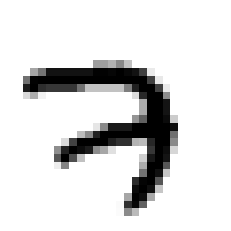

In [112]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [113]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [114]:
X_valid.shape

(5000, 28, 28)

In [115]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

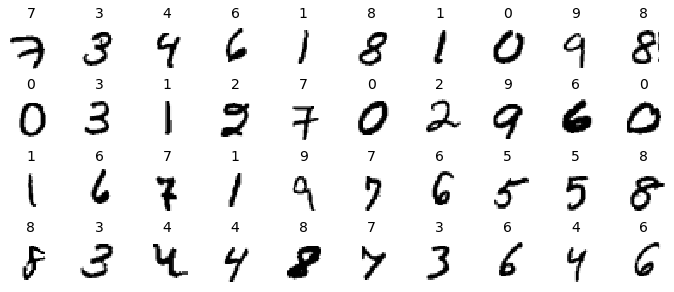

In [116]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [117]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [118]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [119]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [120]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [121]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5843 - val_loss: nan - val_accuracy: 0.0958


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

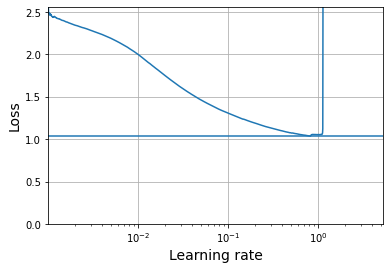

In [122]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [123]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [125]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [126]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [127]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2363 - accuracy: 0.9264 - val_loss: 0.0972 - val_accuracy: 0.9720
Epoch 2/100
1719/1719 [==============================] - 2s 997us/step - loss: 0.0948 - accuracy: 0.9702 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0783 - val_accuracy: 0.9770
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0463 - accuracy: 0.9848 - val_loss: 0.0827 - val_accuracy: 0.9766
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.0698 - val_accuracy: 0.9826
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.1048 - val_accuracy: 0.9758
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0932 - val_

In [128]:
model = tf.keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 908us/step - loss: 0.0708 - accuracy: 0.9799


[0.07079131156206131, 0.9799000024795532]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [129]:
%tensorboard --logdir=./my_mnist_logs